In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("birth.csv")

In [3]:
data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
data.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [7]:
data['day'].fillna(0, inplace=True)

In [8]:
data['day'] = data['day'].astype(int)

In [9]:
data['decade'] = 10 * (data['year'] // 10)

In [12]:
data.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

In [15]:
data.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

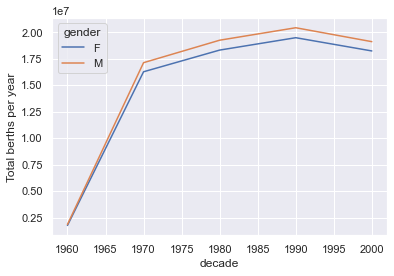

In [18]:
birth_decade = data.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
birth_decade.plot()
plt.ylabel("Total berths per year")
plt.show()

we must clean the data a bit by removing the outliers via robust sigma-clipping operation

In [19]:
import numpy as np
quartiles = np.percentile(data['births'],[25,50,75])

In [20]:
quartiles

array([4358. , 4814. , 5289.5])

In [25]:
mu = quartiles[1]
mu

4814.0

In [24]:
sig = 0.74 * (quartiles[2]-quartiles[0])
sig

689.31

In [23]:
data.describe()

,year,month,day,births,decade
count,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.221265,9762.293561,1974.544285
std,6.728340,3.449632,15.357008,28552.465810,6.789583
min,1969.000000,1.000000,0.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


In [26]:
births = data.query('(births > @mu - 5 *@sig) & (births < @mu + 5*@sig)')

In [28]:
births['day'] = data['day'].astype(int)

<ipython-input-28-eb95a66fa06d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = data['day'].astype(int)


In [36]:
births.index = pd.to_datetime(10000* births.year + 100* births.month + births.day, format='%Y%m%d')
births['days_of_week']= births.index.dayofweek

<ipython-input-36-f80a0a40cded>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['days_of_week']= births.index.dayofweek


<ipython-input-37-edd6e9f582f5>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Tue','Wed','Thu','Fri','Sat','Sun','Mon'])


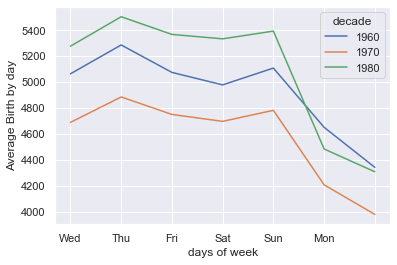

In [37]:
births.pivot_table('births', index='days of week', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Tue','Wed','Thu','Fri','Sat','Sun','Mon'])
plt.ylabel('Average Birth by day')
plt.show()

In [41]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])

In [42]:
births_month.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [44]:
births_month.index = [pd.datetime(2012,month,day) for (month, day) in births_month.index]

<ipython-input-44-fcc1b57ea960>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012,month,day) for (month, day) in births_month.index]


In [45]:
births_month.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


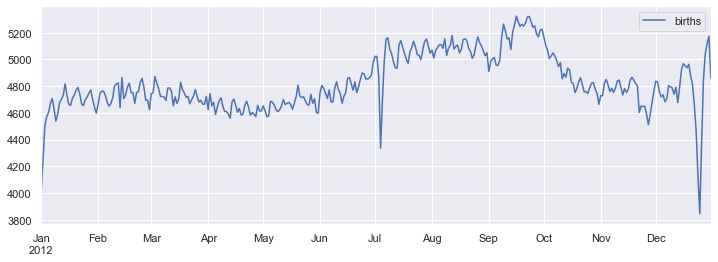

In [46]:
fig, ax =plt.subplots(figsize=(12,4))
births_month.plot(ax=ax)
plt.show()